# Using Python to find the correlations between variables in a movies dataset

## Import necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.style.use("ggplot")

In [19]:
# read in the movies.csv dataset into a pandas dataframe object

df = pd.read_csv("Data\\movies.csv")

In [3]:
#display dataframe

df

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,NaN,Drama,2020,"October 23, 2020 (United States)",3.1,18.0,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000.0,NaN,NaN,90.0
7664,Dream Round,NaN,Comedy,2020,"February 7, 2020 (United States)",4.7,36.0,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,NaN,NaN,Cactus Blue Entertainment,90.0
7665,Saving Mbango,NaN,Drama,2020,"April 27, 2020 (Cameroon)",5.7,29.0,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750.0,NaN,Embi Productions,NaN
7666,It's Just Us,NaN,Drama,2020,"October 1, 2020 (United States)",NaN,NaN,James Randall,James Randall,Christina Roz,United States,15000.0,NaN,NaN,120.0


In [4]:
#print technical information about the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7668 non-null   object 
 1   rating    7591 non-null   object 
 2   genre     7668 non-null   object 
 3   year      7668 non-null   int64  
 4   released  7666 non-null   object 
 5   score     7665 non-null   float64
 6   votes     7665 non-null   float64
 7   director  7668 non-null   object 
 8   writer    7665 non-null   object 
 9   star      7667 non-null   object 
 10  country   7665 non-null   object 
 11  budget    5497 non-null   float64
 12  gross     7479 non-null   float64
 13  company   7651 non-null   object 
 14  runtime   7664 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 898.7+ KB


In [5]:
#for each column, check how many rows contain missing or NaN values

df.isna().sum()

name           0
rating        77
genre          0
year           0
released       2
score          3
votes          3
director       0
writer         3
star           1
country        3
budget      2171
gross        189
company       17
runtime        4
dtype: int64

In [20]:
#the budget column contains too many missing values, we can impute
#missing values in the budget variable with the mean variable

df['budget'] = df['budget'].fillna(df['budget'].mean())

df.isna().sum()

name          0
rating       77
genre         0
year          0
released      2
score         3
votes         3
director      0
writer        3
star          1
country       3
budget        0
gross       189
company      17
runtime       4
dtype: int64

In [21]:
#for the remaining few missing rows, we can just drop them 

df.dropna(how='any', axis=0, inplace=True)

df.isna().sum()

name        0
rating      0
genre       0
year        0
released    0
score       0
votes       0
director    0
writer      0
star        0
country     0
budget      0
gross       0
company     0
runtime     0
dtype: int64

In [22]:
#convert some variables of datatype float64 into int64
df['budget'] = df['budget'].astype('int64')
df['gross'] = df['gross'].astype('int64')

In [23]:
## for the numerical variables, perform summary statistics

df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
year,7412.0,2.000641e+03,1.102874e+01,1980.0,1991.00,2001.0,2010.00,2.020000e+03
score,7412.0,6.396910e+00,9.631617e-01,1.9,5.80,6.5,7.10,9.300000e+00
votes,7412.0,9.076357e+04,1.653466e+05,105.0,10000.00,34000.0,96000.00,2.400000e+06
budget,7412.0,3.589654e+07,3.555351e+07,6000.0,14000000.00,35000000.0,35589876.00,3.560000e+08
gross,7412.0,7.899355e+07,1.662164e+08,309.0,4633887.75,20403521.5,76442306.75,2.847246e+09
runtime,7412.0,1.074464e+02,1.851747e+01,63.0,95.00,104.0,116.00,3.660000e+02


In [24]:
df

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7651,The Call of the Wild,PG,Adventure,2020,"February 21, 2020 (United States)",6.8,42000.0,Chris Sanders,Michael Green,Harrison Ford,Canada,135000000,111105497,20th Century Studios,100.0
7652,The Eight Hundred,Not Rated,Action,2020,"August 28, 2020 (United States)",6.8,3700.0,Hu Guan,Hu Guan,Zhi-zhong Huang,China,80000000,461421559,Beijing Diqi Yinxiang Entertainment,149.0
7653,The Quarry,R,Crime,2020,"April 17, 2020 (Mexico)",5.4,2400.0,Scott Teems,Scott Teems,Shea Whigham,United States,35589876,3661,Prowess Pictures,98.0
7656,Tulsa,PG-13,Comedy,2020,"June 3, 2020 (United States)",5.0,294.0,Scott Pryor,Scott Pryor,Scott Pryor,United States,35589876,413378,Pryor Entertainment,120.0


In [25]:
#create a new column from the year_released and extract only the year
#this will be the 'correct' year the movie was released
#as the columns 'year', and 'released can differ'

df['year_correct'] = df['released'].apply(lambda x: x.split(" (")[0][-4:])

In [27]:

#drop redudant cols
df.drop(columns=['year', 'released'], axis=1, inplace=True)

df

,name,rating,genre,score,votes,director,writer,star,country,budget,gross,company,runtime,year_correct
0,The Shining,R,Drama,8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0,1980
1,The Blue Lagoon,R,Adventure,5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0,1980
3,Airplane!,PG,Comedy,7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0,1980
4,Caddyshack,R,Comedy,7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0,1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7651,The Call of the Wild,PG,Adventure,6.8,42000.0,Chris Sanders,Michael Green,Harrison Ford,Canada,135000000,111105497,20th Century Studios,100.0,2020
7652,The Eight Hundred,Not Rated,Action,6.8,3700.0,Hu Guan,Hu Guan,Zhi-zhong Huang,China,80000000,461421559,Beijing Diqi Yinxiang Entertainment,149.0,2020
7653,The Quarry,R,Crime,5.4,2400.0,Scott Teems,Scott Teems,Shea Whigham,United States,35589876,3661,Prowess Pictures,98.0,2020
7656,Tulsa,PG-13,Comedy,5.0,294.0,Scott Pryor,Scott Pryor,Scott Pryor,United States,35589876,413378,Pryor Entertainment,120.0,2020


In [31]:
#convert the new year_correct into an int

df['year_correct'] = df['year_correct'].astype('int64')

In [34]:
#check for duplicated values

df.duplicated(keep=False).sum()

0

In [37]:
pd.set_option('display.max_rows', None)

<AxesSubplot:>

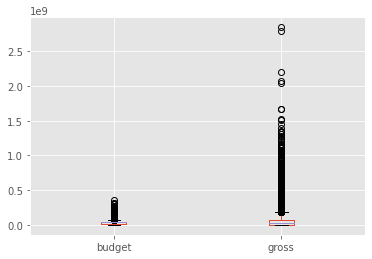

In [40]:
#create boxplots for select variables

df.boxplot(column=['budget', 'gross'])

<AxesSubplot:xlabel='budget', ylabel='gross'>

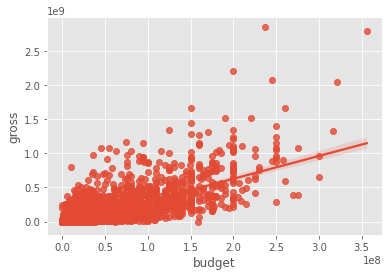

In [41]:
#quick regression plot between a movies budget and gross

sns.regplot(x='budget', y='gross', data=df)

<AxesSubplot:xlabel='score', ylabel='gross'>

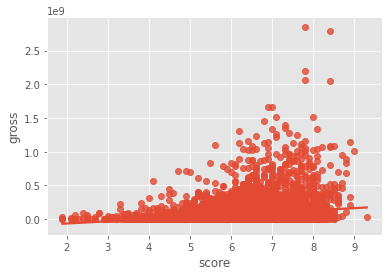

In [43]:
#regression plot gross vs score(rating)
sns.regplot(x='score', y='gross', data=df)

In [44]:
#insights: as the movies budget increases, the movies gross value 
#increases too, similarily movies with higher scores(ratings) have
# a higher gross value

Text(439.16666666666663, 0.5, 'Movie features')

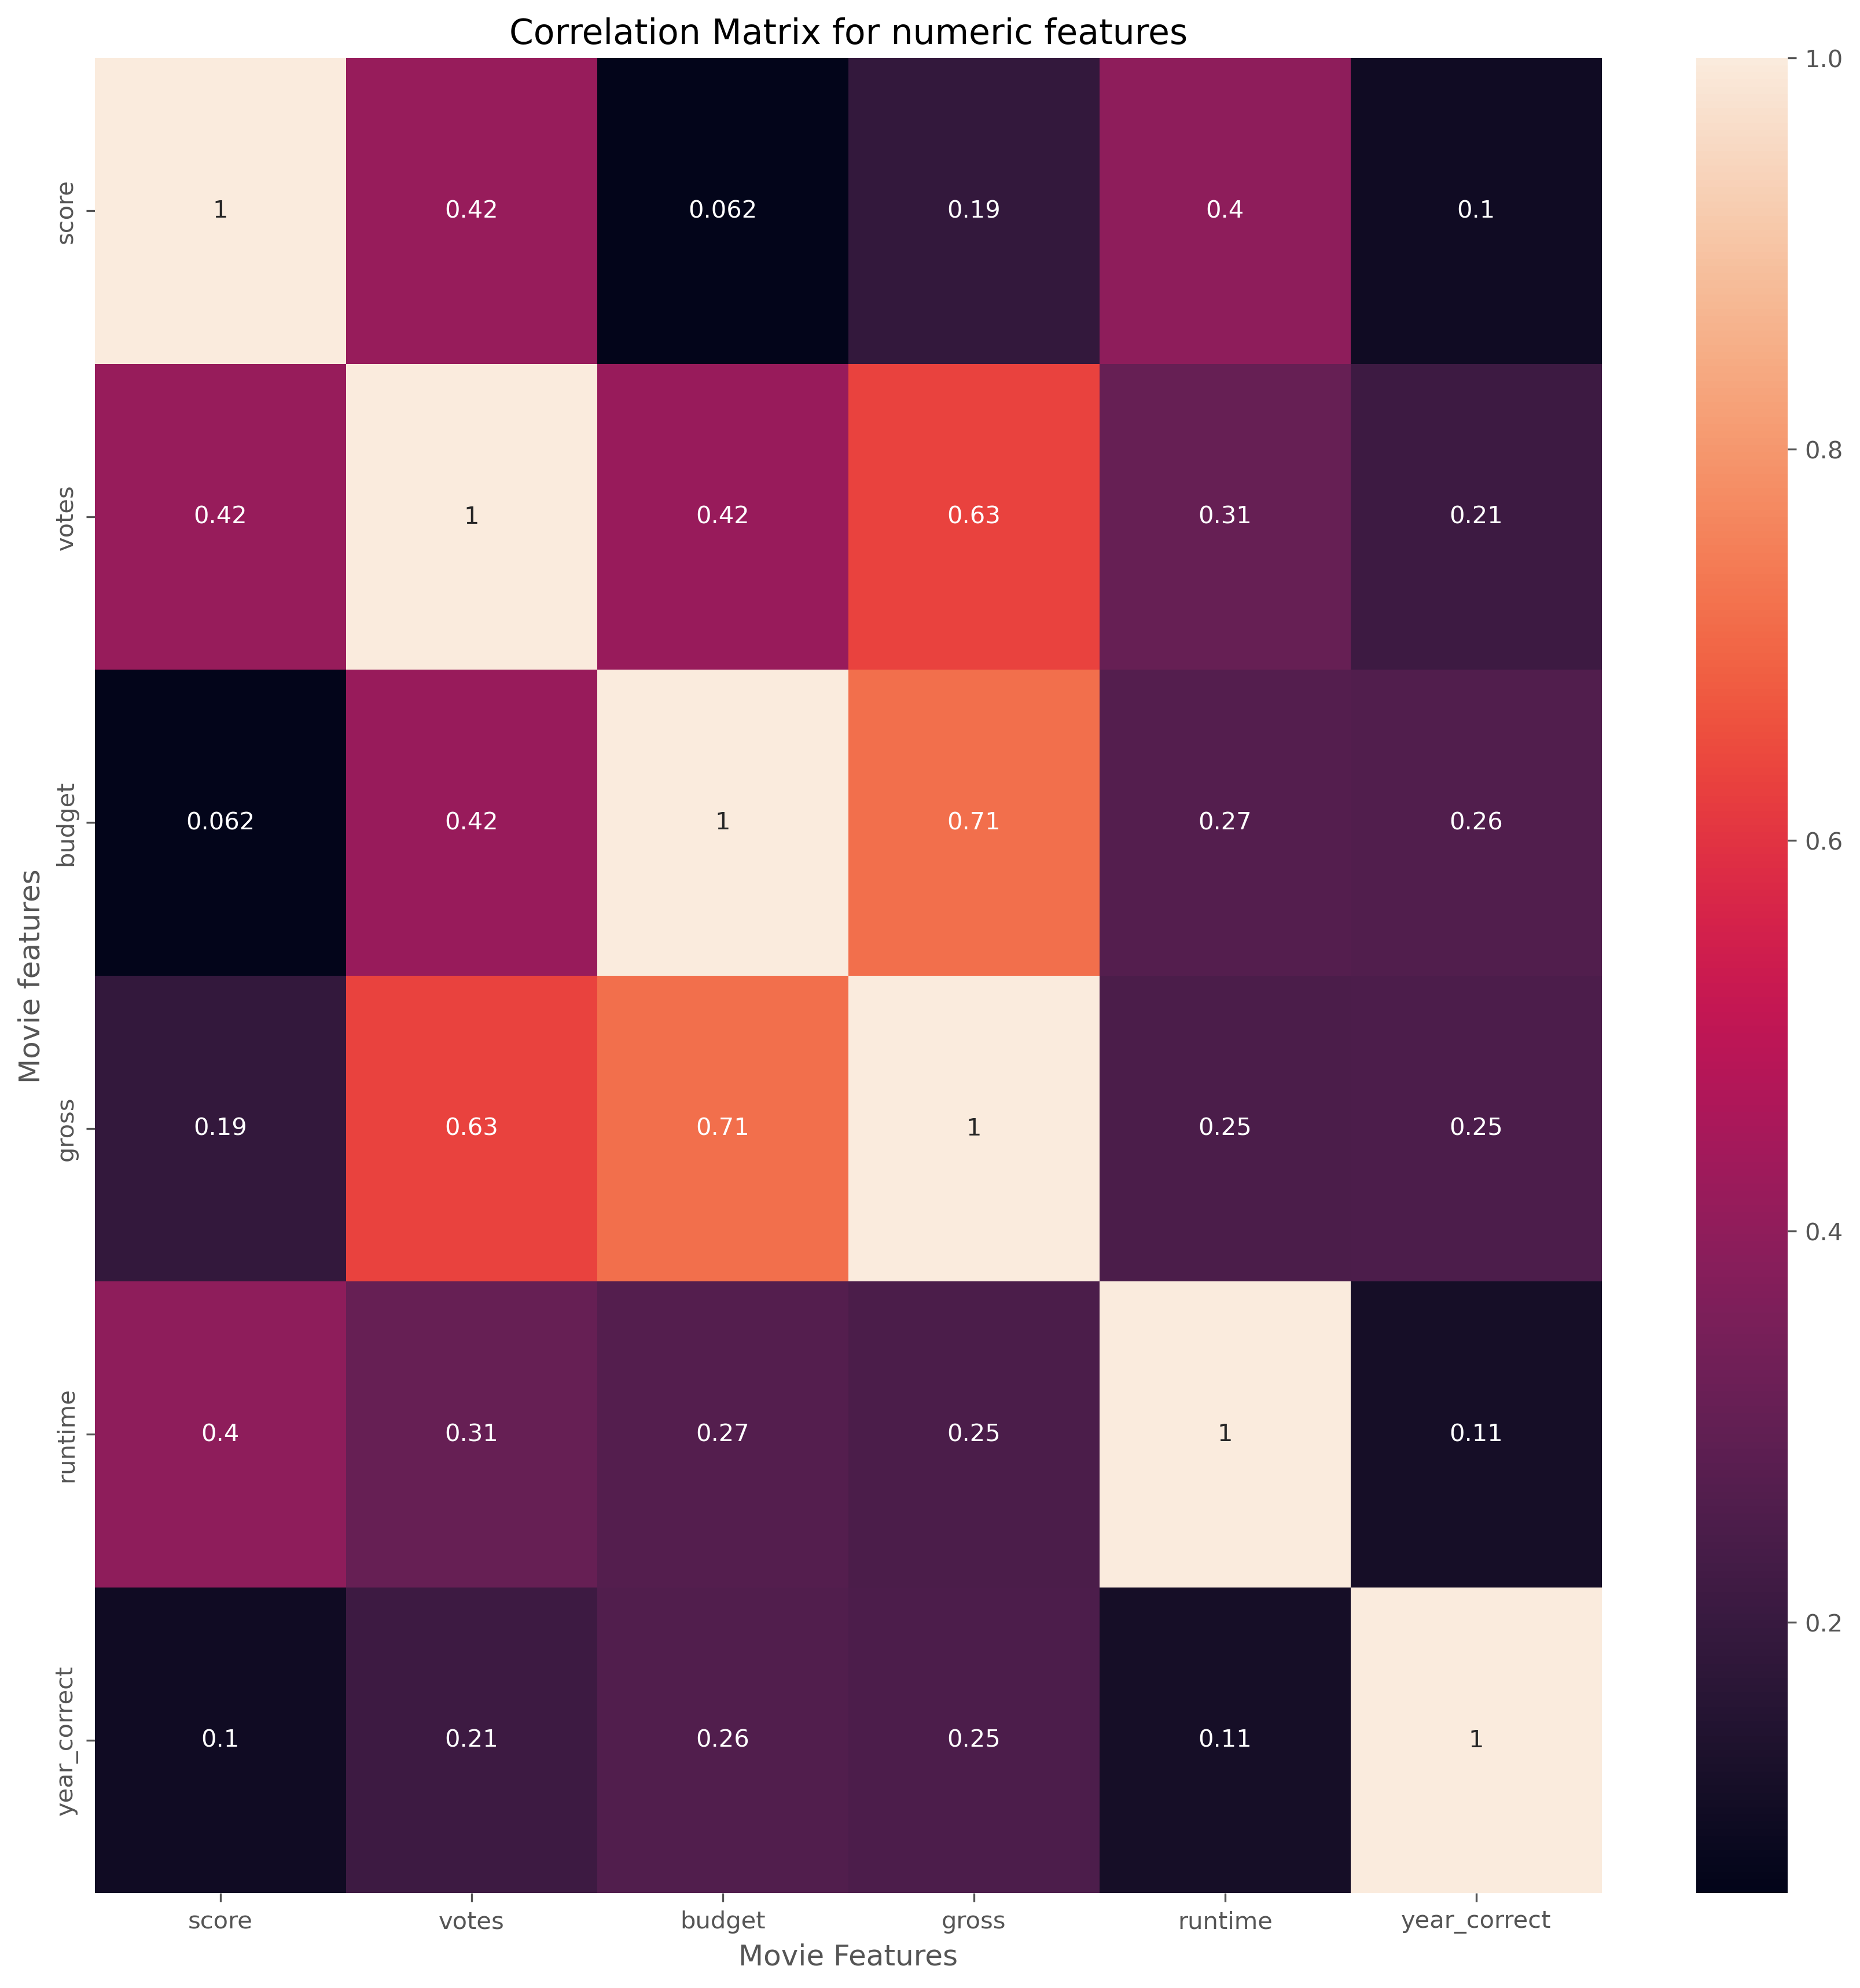

In [46]:
#plot a correlation matrix(pearsons r) of the numerical variables

correlation_matrix = df.corr()

plt.figure(figsize=(14,14), dpi=300)
sns.heatmap(correlation_matrix, annot=True)
plt.title("Correlation Matrix for numeric features")
plt.xlabel("Movie Features")
plt.ylabel("Movie features")

In [48]:
# using the factorize method to construct a correlation matrix including
# the catergorical values, 

#factorize assigns a random numerical value for each unique categorical
#variable

df.apply(lambda x: x.factorize()[0]).corr()

,name,rating,genre,score,votes,director,writer,star,country,budget,gross,company,runtime,year_correct
name,1.000000,0.146414,0.030281,-0.040444,0.283260,0.742323,0.801330,0.727983,0.148992,0.275762,0.964776,0.592357,0.045947,0.800275
rating,0.146414,1.000000,-0.083557,0.013357,0.105346,0.091372,0.110643,0.101151,0.019739,0.189942,0.156428,-0.019134,0.038469,0.137037
genre,0.030281,-0.083557,1.000000,-0.009702,0.020944,0.041438,0.030915,0.032209,-0.019693,0.058566,0.032602,0.004804,0.001904,0.025148
score,-0.040444,0.013357,-0.009702,1.000000,-0.000879,-0.020058,-0.030064,-0.002816,0.038228,-0.010117,-0.037128,-0.020372,0.034295,-0.034561
votes,0.283260,0.105346,0.020944,-0.000879,1.000000,0.178643,0.215097,0.167985,-0.046664,0.399629,0.295239,-0.003643,0.113626,0.270864
director,0.742323,0.091372,0.041438,-0.020058,0.178643,1.000000,0.746847,0.678961,0.163625,0.104678,0.769451,0.551646,-0.017734,0.622739
writer,0.801330,0.110643,0.030915,-0.030064,0.215097,0.746847,1.000000,0.672856,0.167228,0.185070,0.822564,0.546044,0.029178,0.688632
star,0.727983,0.101151,0.032209,-0.002816,0.167985,0.678961,0.672856,1.000000,0.187301,0.109078,0.754470,0.527795,0.031680,0.620893
country,0.148992,0.019739,-0.019693,0.038228,-0.046664,0.163625,0.167228,0.187301,1.000000,-0.062355,0.149179,0.226220,0.115045,0.110564
budget,0.275762,0.189942,0.058566,-0.010117,0.399629,0.104678,0.185070,0.109078,-0.062355,1.000000,0.290415,-0.087841,0.119892,0.280364


Text(0.5, 1.0, 'Correlation Matrix for all movie features')

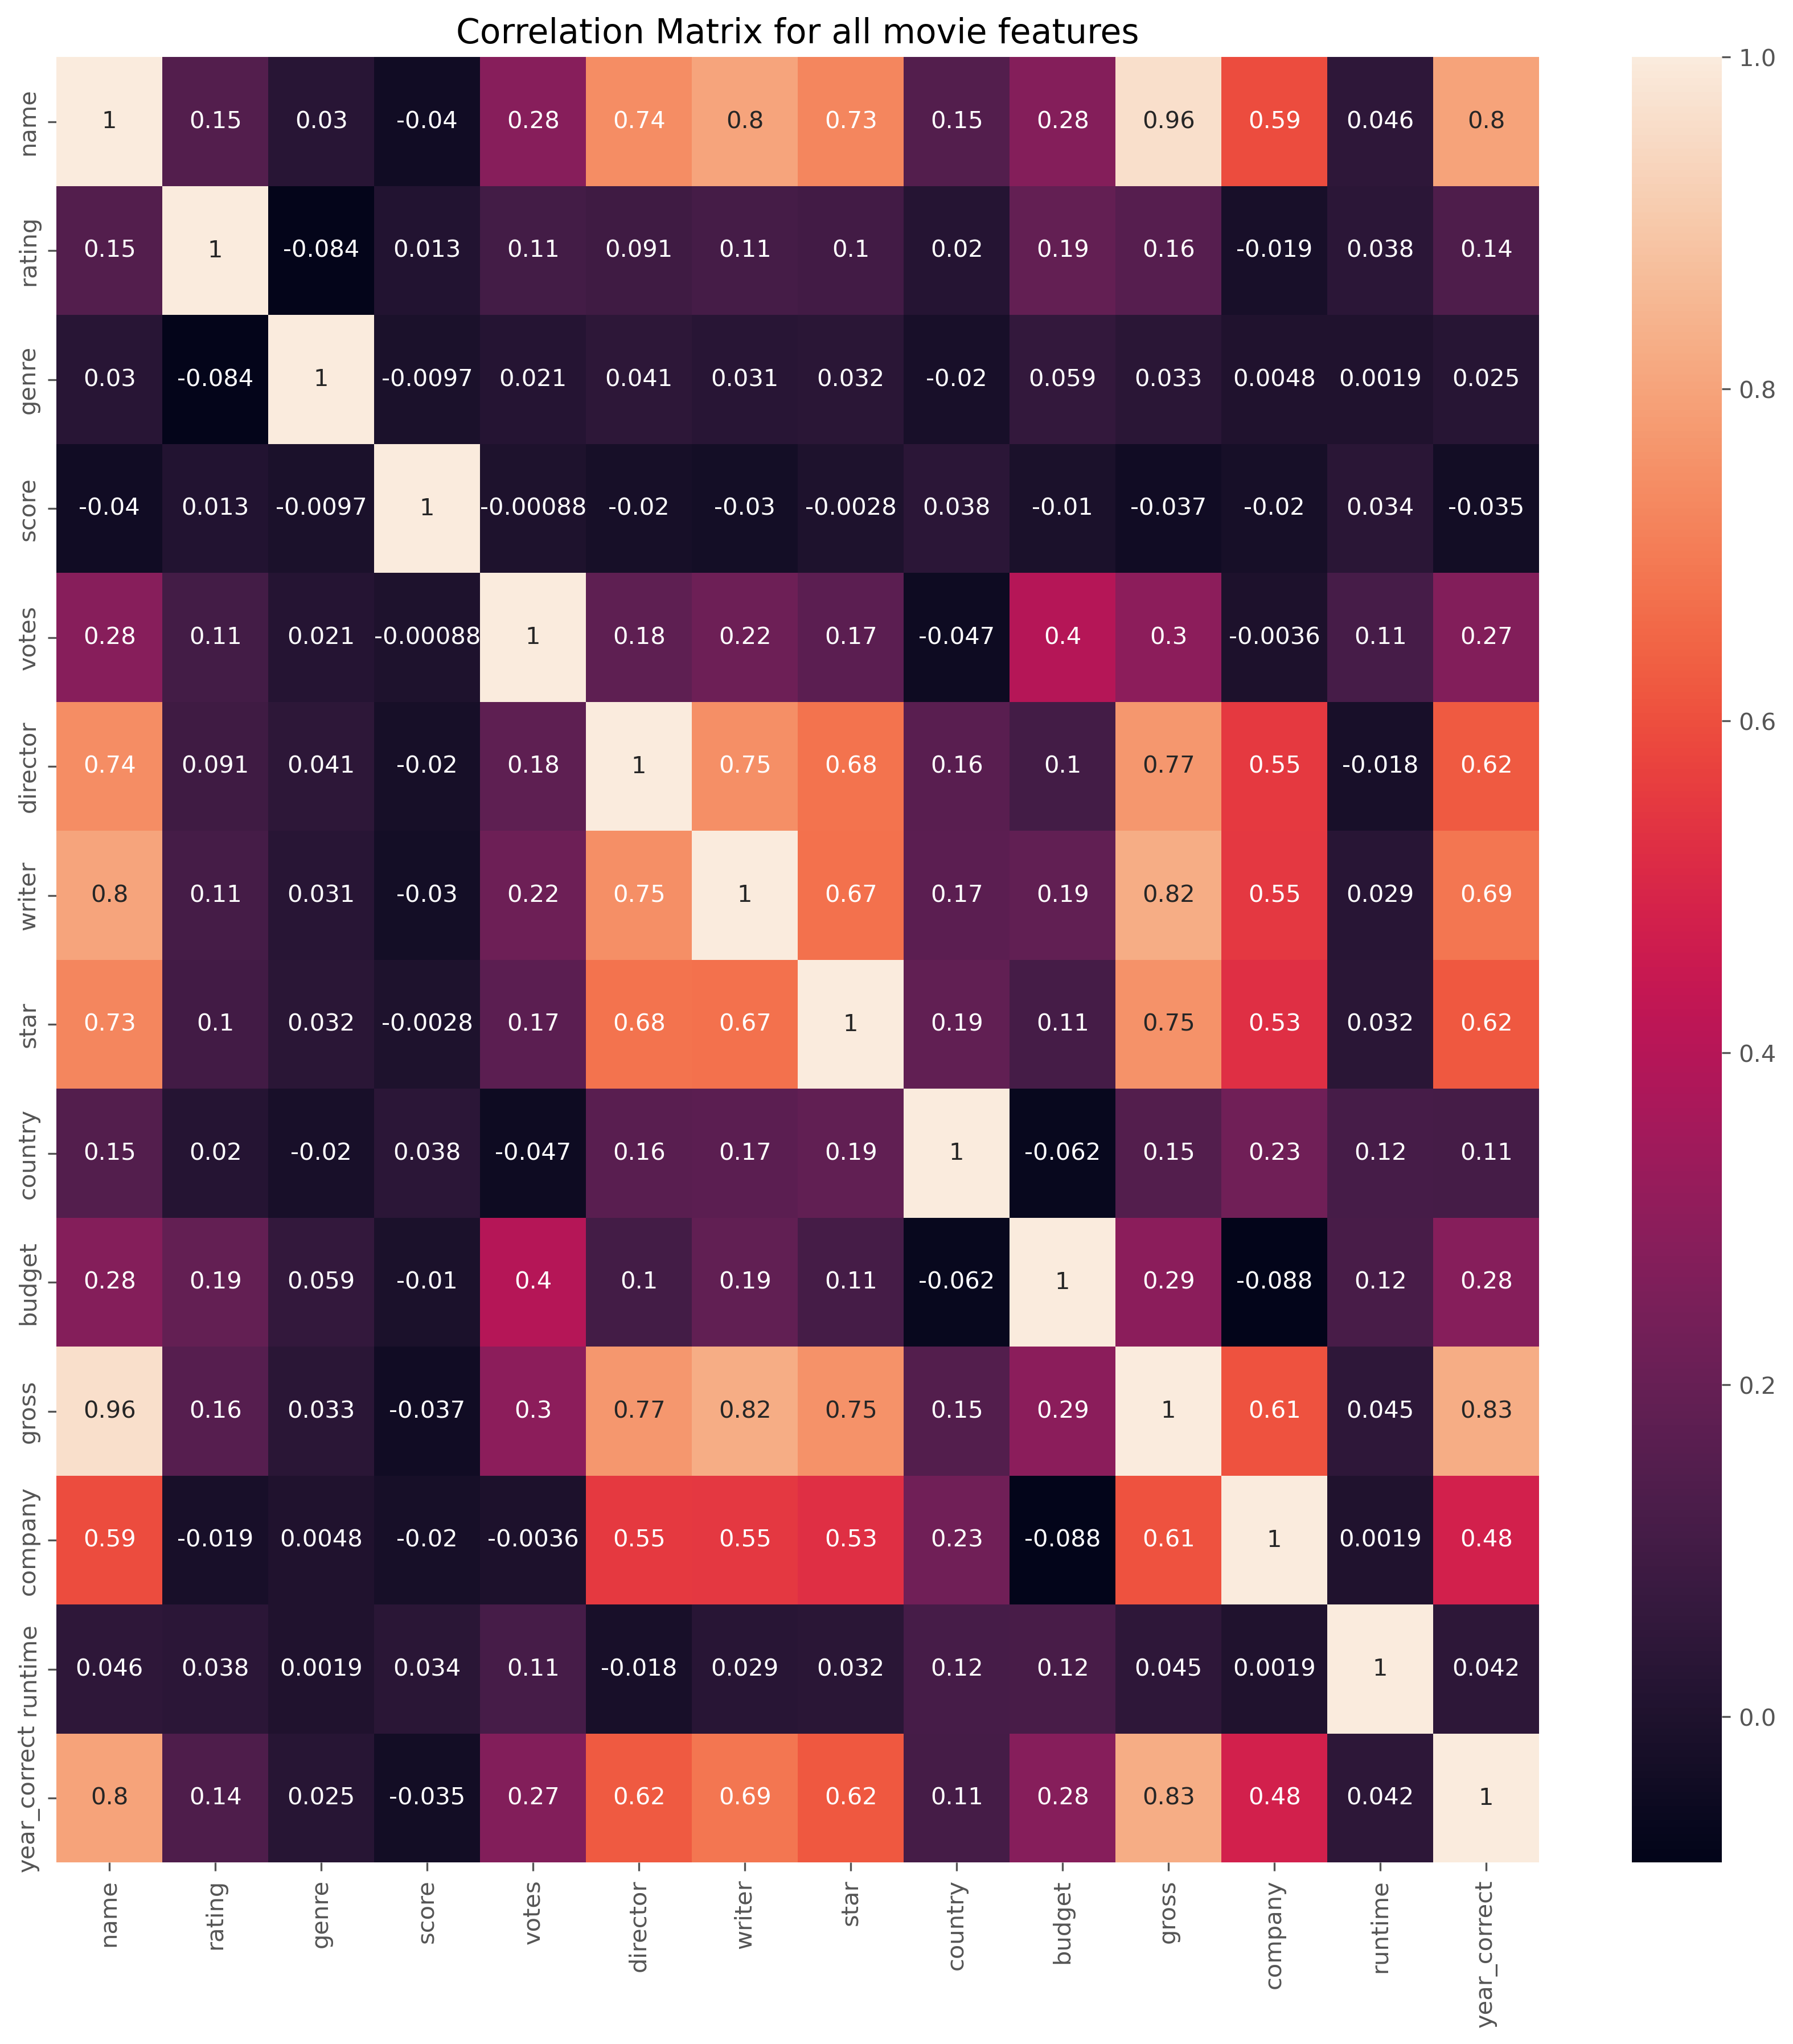

In [50]:
plt.figure(figsize=(14, 14), dpi=300)
corr_matrix = df.apply(lambda x: x.factorize()[0]).corr()

sns.heatmap(corr_matrix, annot=True)
plt.title("Correlation Matrix for all movie features")

In [51]:
#look at the correlation pairs for each variable in the dataset

corr_pairs = corr_matrix.unstack()

corr_pairs

name          name            1.000000
              rating          0.146414
              genre           0.030281
              score          -0.040444
              votes           0.283260
              director        0.742323
              writer          0.801330
              star            0.727983
              country         0.148992
              budget          0.275762
              gross           0.964776
              company         0.592357
              runtime         0.045947
              year_correct    0.800275
rating        name            0.146414
              rating          1.000000
              genre          -0.083557
              score           0.013357
              votes           0.105346
              director        0.091372
              writer          0.110643
              star            0.101151
              country         0.019739
              budget          0.189942
              gross           0.156428
              company    

In [53]:
#sort the pairs

sorted_corr_pairs = corr_pairs.sort_values(kind='quicksort')

sorted_corr_pairs

company       budget         -0.087841
budget        company        -0.087841
genre         rating         -0.083557
rating        genre          -0.083557
budget        country        -0.062355
country       budget         -0.062355
              votes          -0.046664
votes         country        -0.046664
name          score          -0.040444
score         name           -0.040444
              gross          -0.037128
gross         score          -0.037128
score         year_correct   -0.034561
year_correct  score          -0.034561
score         writer         -0.030064
writer        score          -0.030064
score         company        -0.020372
company       score          -0.020372
director      score          -0.020058
score         director       -0.020058
genre         country        -0.019693
country       genre          -0.019693
company       rating         -0.019134
rating        company        -0.019134
runtime       director       -0.017734
director      runtime    

In [54]:
#look at correlation pairs that have a r coefficient > 0.5

strong_corr_pairs = sorted_corr_pairs[abs(sorted_corr_pairs) > 0.5]

strong_corr_pairs

star          company         0.527795
company       star            0.527795
              writer          0.546044
writer        company         0.546044
director      company         0.551646
company       director        0.551646
              name            0.592357
name          company         0.592357
company       gross           0.607908
gross         company         0.607908
star          year_correct    0.620893
year_correct  star            0.620893
director      year_correct    0.622739
year_correct  director        0.622739
star          writer          0.672856
writer        star            0.672856
star          director        0.678961
director      star            0.678961
writer        year_correct    0.688632
year_correct  writer          0.688632
name          star            0.727983
star          name            0.727983
name          director        0.742323
director      name            0.742323
              writer          0.746847
writer        director   

In [60]:
### looking at movie company gross

company_gross = df.groupby('company')[['gross']].sum()

company_gross_sorted = company_gross.sort_values('gross', ascending=False)[:15]


#top 15 companies with highest gross
company_gross_sorted

,gross
company,
Warner Bros.,56329179122
Universal Pictures,52514188890
Columbia Pictures,43008941346
Paramount Pictures,40493607415
Twentieth Century Fox,40257053857
Walt Disney Pictures,36327887792
New Line Cinema,19867862616
Marvel Studios,15065592411
DreamWorks Animation,11873612858


In [62]:
pd.set_option('display.max_rows', 20)

In [66]:
df.groupby(['company', 'year_correct'])[['gross']].sum()

,,gross
company,year_correct,
"""DIA"" Productions GmbH & Co. KG",2003,44350926
"""Weathering With You"" Film Partners",2020,193457467
.406 Production,1997,10580
1+2 Seisaku Iinkai,2000,1196218
10 West Studios,2010,814906
...,...,...
i am OTHER,2015,17986781
i5 Films,2001,10031529
iDeal Partners Film Fund,2013,506303


In [68]:
company_gross2 = df.groupby(['company', 'year_correct'])[['gross']].sum()

company_gross2_sorted = company_gross2.sort_values(['gross', 'company', 'year_correct'], ascending=False)

company_gross2_sorted

,,gross
company,year_correct,
Walt Disney Pictures,2019,5773131804
Marvel Studios,2018,4018631866
Universal Pictures,2015,3834354888
Twentieth Century Fox,2009,3793491246
Walt Disney Pictures,2017,3789382071
...,...,...
Process Film,2011,2037
Cinema Libre Studio,2011,1808
Balboa Entertainment,1996,1605


Text(0, 0.5, 'Gross Earnings')

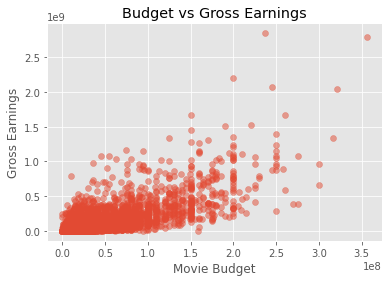

In [69]:
plt.scatter(x=df['budget'], y=df['gross'], alpha=0.5)
plt.title("Budget vs Gross Earnings")
plt.xlabel("Movie Budget")
plt.ylabel("Gross Earnings")

In [70]:
df

,name,rating,genre,score,votes,director,writer,star,country,budget,gross,company,runtime,year_correct
0,The Shining,R,Drama,8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0,1980
1,The Blue Lagoon,R,Adventure,5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0,1980
3,Airplane!,PG,Comedy,7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0,1980
4,Caddyshack,R,Comedy,7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0,1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7651,The Call of the Wild,PG,Adventure,6.8,42000.0,Chris Sanders,Michael Green,Harrison Ford,Canada,135000000,111105497,20th Century Studios,100.0,2020
7652,The Eight Hundred,Not Rated,Action,6.8,3700.0,Hu Guan,Hu Guan,Zhi-zhong Huang,China,80000000,461421559,Beijing Diqi Yinxiang Entertainment,149.0,2020
7653,The Quarry,R,Crime,5.4,2400.0,Scott Teems,Scott Teems,Shea Whigham,United States,35589876,3661,Prowess Pictures,98.0,2020
7656,Tulsa,PG-13,Comedy,5.0,294.0,Scott Pryor,Scott Pryor,Scott Pryor,United States,35589876,413378,Pryor Entertainment,120.0,2020


In [79]:
## Average movie score for moving rating categories

movie_rating = df.groupby('rating')[['score', 'gross', 'budget']].mean()

movie_rating

,score,gross,budget
rating,,,
Approved,3.400000,3.656528e+07,6.500000e+06
G,6.582237,1.420433e+08,4.852470e+07
NC-17,6.547826,1.076324e+07,2.227125e+07
Not Rated,6.934496,1.784959e+07,3.095324e+07
PG,6.223852,1.066129e+08,4.192791e+07
PG-13,6.293825,1.309839e+08,4.834640e+07
R,6.463221,4.272375e+07,2.673144e+07
TV-14,6.300000,5.756185e+06,3.558988e+07
TV-MA,7.022222,7.917078e+07,3.368101e+07


In [78]:
#top 10 movies with highest gross
top10_movies_df = df[['name', 'rating', 'score', 'budget', 'gross']]

top10_movies_df = top10_movies_df.sort_values(['gross', 'score'], ascending=False)[:10]

top10_movies_df

,name,rating,score,budget,gross
5445,Avatar,PG-13,7.8,237000000,2847246203
7445,Avengers: Endgame,PG-13,8.4,356000000,2797501328
3045,Titanic,PG-13,7.8,200000000,2201647264
6663,Star Wars: Episode VII - The Force Awakens,PG-13,7.8,245000000,2069521700
7244,Avengers: Infinity War,PG-13,8.4,321000000,2048359754
7480,The Lion King,PG,6.9,260000000,1670727580
6653,Jurassic World,PG-13,7.0,150000000,1670516444
6043,The Avengers,PG-13,8.0,220000000,1518815515
6646,Furious 7,PG-13,7.1,190000000,1515341399
7494,Frozen II,PG,6.8,150000000,1450026933
